# Fitting camera parameters by objects of given height

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import CameraTransform as ct

Then we define the intrinsic parameters of the camera:

In [2]:
# intrinsic camera parameters
f = 6.2
sensor_size = (6.17, 4.55)
image_size = (3264, 2448)

# initialize the camera
cam = ct.CameraTransform(f, sensor_size, image_size)

In [3]:
# define the horizon points
horizon = np.array([[ 185.708, 1689.906, 2709.230, 3171.416,  938.221],
                    [ 795.467,  847.153,  880.665,  896.025,  820.386]])

# fix the horizon for the camera
cam.fixHorizon(horizon)

In [4]:
# define the feet and head points
feet_cam = np.array([[2444.983, 2648.486, 2843.791, 2820.373, 3193.688, 1902.720, 1543.973, 1490.770, 1660.660, 1787.174, 2020.442, 2074.914, 2555.684, 2904.453, 3084.393, 1595.931, 1562.091, 1851.034, 2215.969, 2756.997, 1969.461, 1870.150],
                     [1569.205, 1556.647, 1545.462, 1445.683, 1554.840, 1412.185, 1497.422, 1407.026, 1563.188, 1588.567, 1606.385, 1606.847, 1607.042, 1462.714, 1597.782, 1520.728, 1481.460, 1441.808, 1419.911, 1535.729, 1597.528, 1449.718]])
heads_cam = np.array([[2444.983, 2648.486, 2843.791, 2820.373, 3193.688, 1902.720, 1543.973, 1490.770, 1660.660, 1787.174, 2020.442, 2074.914, 2555.684, 2904.453, 3084.393, 1595.931, 1562.091, 1851.034, 2215.969, 2756.997, 1969.461, 1870.150],
                      [1548.691, 1537.182, 1526.287, 1429.232, 1535.311, 1395.279, 1478.906, 1390.332, 1542.916, 1566.117, 1584.135, 1585.859, 1588.504, 1445.887, 1576.425, 1501.253, 1463.102, 1424.282, 1403.555, 1516.264, 1576.358, 1432.114]])

# fit the camera parameters from the feet and heads
p = cam.fitCamParametersFromObjects(feet_cam, heads_cam, object_height=1)

# print the fitted camera parameters
print(cam)

{'height': 34.025953738532721, 'tilt': 83.307120564413921}
CameraTransform(
  intrinsic:
    f:		6.2 mm
    sensor:	6.17×4.55 mm
    image:	3264×2448 px
  position:
    x:	0.000000 m
    y:	0.000000 m
    h:	34.025954 m
  orientation:
    tilt:		83.307121°
    roll:		-1.933622°
    heading:	0.000000°
)


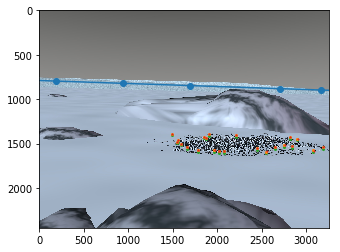

In [5]:
""" plot the results """
# load the image
im = plt.imread("CameraImage.jpg")

# plot the input horizon
plt.plot(horizon[0, :], horizon[1, :], 'C0o')
# plot the fitted horizon
horizon_fitted = cam.getImageHorizon()
plt.plot(horizon_fitted[0], horizon_fitted[1], '-C0', ms=2)

# plot the input feet and heads
plt.plot(feet_cam[0], feet_cam[1], 'C2o', label='feet', ms=2)
plt.plot(heads_cam[0], heads_cam[1], 'C1o', label='head', ms=2)

# project the feet to the world
feet_world = cam.transCamToWorld(feet_cam, Z=0)
# the heads are just 1m over the feet
head_world = np.array([feet_world[0], feet_world[1], feet_world[2]+1])
# estimate the heads back in the camera image
head_cam_estimate = cam.transWorldToCam(head_world)

# plot the reconstructed heads
plt.plot(head_cam_estimate[0], head_cam_estimate[1], 'C3+', label='projection', ms=2)

# show the image
plt.imshow(im)

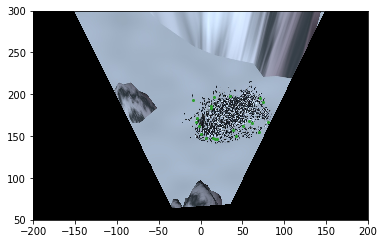

In [6]:
# plot the feet in the world coordinates
feet = cam.transCamToWorld(feet_cam, Z=0)
plt.plot(feet[0, :], feet[1, :], 'C2o', ms=2)

# display a top view of the image
im2 = cam.getTopViewOfImage(im, [-200, 200, 50, 300], scaling=0.1, do_plot=True)